In [39]:
%matplotlib inline

import itertools
import os

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cosine, jaccard
import seaborn as sns
from pyclonal.parser import combineFiles
import glob
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.html.widgets import interact
init_notebook_mode(connected=True)
from plotly.offline import iplot

In [2]:
#uses Ilyas code to get combined dataframe

df, seq_df = combineFiles(glob.glob('../sample_input_files/D*.tsv'))


../sample_input_files/D280.changeo_small.tsv looks like a changeo file
../sample_input_files/D233.changeo_small.tsv looks like a changeo file
../sample_input_files/D255.changeo_small.tsv looks like a changeo file
../sample_input_files/D299.changeo_small.tsv looks like a changeo file
../sample_input_files/D287.changeo_small.tsv looks like a changeo file


In [3]:
metadata=pd.read_csv('../sample_input_files/metadata_csv.txt',index_col='filename')

In [10]:
metadata.head()

,patient_id,tissue_id,subset_1,subset_2,replicate,dna
filename,,,,,,
D233-LLN-CD8-TEM-rep4-200ng_S46,D233,LLN,CD8,TEM,rep4,200ng_S46
D233-BM-CD8-TEM-rep4-200ng_S38,D233,BM,CD8,TEM,rep4,200ng_S38
D299-BM-CD8-TRM-rep2-41ng_S72,D299,BM,CD8,TRM,rep2,41ng_S72
D255-LLN-CD8-TRM-rep1-46ng_S47,D255,LLN,CD8,TRM,rep1,46ng_S47
D280-LLN-CD8-TEM-rep2-26ng_S76,D280,LLN,CD8,TEM,rep2,26ng_S76


In [4]:
merged_df=df.join(metadata)

In [5]:
patient='D233'
filtered_df=merged_df[merged_df['patient_id']==patient] #change here
filtered_df = filtered_df.iloc[:, :-len(metadata.columns)]

In [27]:
res_df = {}
for l1, l2 in itertools.combinations(filtered_df.index, 2):
    res_df.setdefault(l2, {})[l1] = res_df.setdefault(l1, {})[l2] = 1 - cosine(
        list(filtered_df.loc[l1].values),
        list(filtered_df.loc[l2].values),
    )
        
cosine_data=pd.DataFrame(res_df).fillna(1)  #matrix with cosine differences

In [28]:
res_df = {}
for l1, l2 in itertools.combinations(filtered_df.index, 2):
    res_df.setdefault(l2, {})[l1] = res_df.setdefault(l1, {})[l2] =jaccard(
        list(filtered_df.loc[l1].values),
        list(filtered_df.loc[l2].values),
    )
        
jaccard_data=pd.DataFrame(res_df).fillna(1)  #matrix with jaccard differences

In [33]:
def plot_heatmap(method):
    METRIC = method
    if METRIC=='cosine':data=cosine_data
    if METRIC=='jaccard':data=jaccard_data
    
    
    #fig, ax = plt.subplots(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.clustermap(data=data,cmap=cmap)

In [34]:
interact(plot_heatmap, method=['jaccard', 'cosine'])

interactive(children=(Dropdown(description='method', options=('jaccard', 'cosine'), value='jaccard'), Output()…

<function __main__.plot_heatmap>

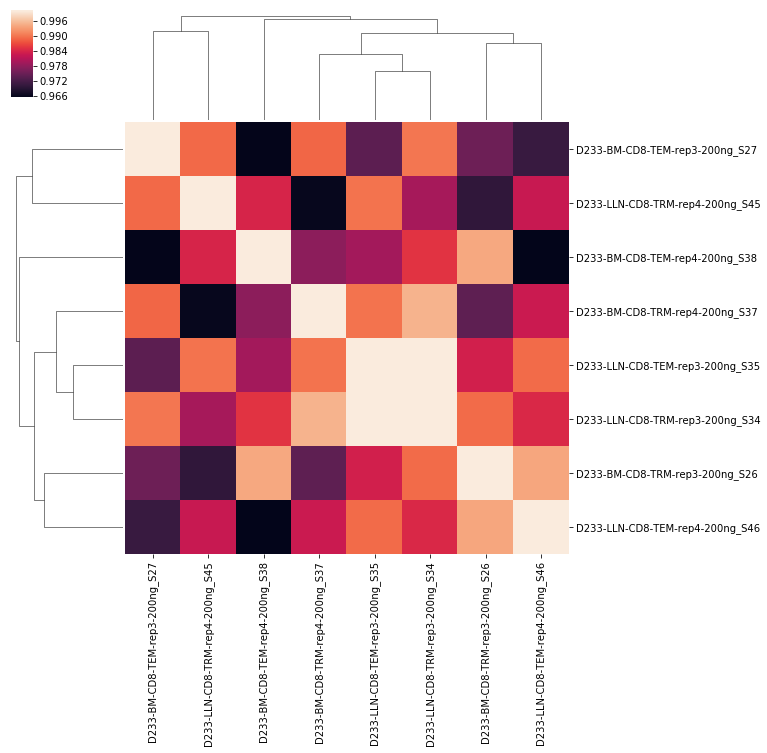

In [35]:
interact(plot_heatmap, method=['jaccard', 'cosine'])

In [37]:
merged_df


,498,506,513,529,541,554,559,568,503,582,...,1998,2001,2037,2045,patient_id,tissue_id,subset_1,subset_2,replicate,dna
Sample,,,,,,,,,,,,,,,,,,,,,
D233-BM-CD8-TEM-rep3-200ng_S27,424.0,5.0,1.0,1.0,7.0,5.0,1.0,13.0,3.0,2.0,...,0.0,0.0,0.0,0.0,D233,BM,CD8,TEM,rep3,200ng_S27
D233-BM-CD8-TEM-rep4-200ng_S38,4.0,6.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,D233,BM,CD8,TEM,rep4,200ng_S38
D233-BM-CD8-TRM-rep3-200ng_S26,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,32.0,0.0,...,0.0,0.0,0.0,0.0,D233,BM,CD8,TRM,rep3,200ng_S26
D233-BM-CD8-TRM-rep4-200ng_S37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,D233,BM,CD8,TRM,rep4,200ng_S37
D233-LLN-CD8-TEM-rep3-200ng_S35,2.0,0.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,D233,LLN,CD8,TEM,rep3,200ng_S35
D233-LLN-CD8-TEM-rep4-200ng_S46,8.0,5.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,D233,LLN,CD8,TEM,rep4,200ng_S46
D233-LLN-CD8-TRM-rep3-200ng_S34,12.0,1.0,0.0,0.0,8.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,D233,LLN,CD8,TRM,rep3,200ng_S34
D233-LLN-CD8-TRM-rep4-200ng_S45,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,D233,LLN,CD8,TRM,rep4,200ng_S45
D255-BM-CD8-TEM-rep1-46ng_S44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,D255,BM,CD8,TEM,rep1,46ng_S44
